<a href="https://colab.research.google.com/github/fengfrankgthb/Demonstrations/blob/main/LIT_CeO2_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAT & GRE tested w/ all-mpnet-base-v2 Model 2025.05.18

In this project, an well-trained **transformer model** is used to represent an knowledgable super-student in front of SAT and GRE reading quexstions. **Biases** and **confusions** are disclosed, likely attributable to **over-fitting** to the training of the model. Over-fitting is the ML terminology for **test cramming**, a phenominon when fitting specificities of **training dataset** caused the model to not being able to fit to specificities of **testing dataset**.

## 1. Install Necessary Libraries
* **sentence-transformers** This is the text embedding library
* **scikit-learn** This is the machine learning library
* **matplotlib** This is the mat-lab style plotting library

In [2]:
!pip install sentence-transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## 2. import necessary modules from the libraries



**mpl_toolkits.mplot3d**: matplot 3D plotting lib

**numpy**: Numerical Python, the fundamental python lib

**Axes3D** 3D plotting class

**PCA** Principal Components Analysis for linear dimension reduction.

**TSNE** t-SNE non-linear dimension reduction to creat more scattered effect

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# set matplot to inline (static) mode, or notebook for interactive mode)
# even though default is inline mode, be explicit to avoid any confusion
# the interactive notebook mode is often unstable at colab environment
# alternative is set as 'inline' and use 'plotly'.
%matplotlib inline

## 3. Imput text data

Choose one subsection below:

### 3.1 Example 1: CeO2-NPs, All-Mighty vs 5Vs (Section 8)

Used **118HHH Q1 on CeO2-NPs** for illustration, breaking into 9 components:

* Pa = All Sentences combined in Passage
* P1 = 1st sentence in Passage
* P2 = 2nd sentence in Passage
* P3 = 3rd sentence in Passage
* Q? = the Question sentence
* Ax = wrong choice A
* Bv = correct answer B
* Cx = wrong choice C
* Dx = wrong choice D

In [4]:
# Example 1: CeO2 Question
# This is a *** question used to directly compare with 5Vs in section 8.1 and 8.2
sentences = ["Pa: Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water. In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha). While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "P1: Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water.",
    "P2: In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha).",
    "P3: While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "Q?: Which finding, if true, would most directly weaken the hypothesis presented in the text?",
    "Ax) When D. polymorpha and O. mykiss are exposed to similar levels of CeO2-NPs, concentrations of CeO2-NPs in animals of both species show little variation from individual to individual.",
    "Bv) The rate of CeO2-NPs uptake in D. polymorpha differs from the rate of CeO2-NPs uptake in O. mykiss in a way that is not yet well understood by researchers.",
    "Cx) D.polymorpha has been shown to accumulate several other types of manufactured nanoparticles in addition to CeO2-NPs, whereas O. mykiss has been shown to accumulate only CeO2-NPs.",
    "Dx) Compared with O. mykiss, D.polymorpha can accumulate detectable CeO2-NPs concentrations with significantly fewer negative effects."
]

### 3.2 Examples 2-3-4-5 & Alternatives:

* **Queen Egypt**: demonstrates **omis bias**.
* **LNH Study**: demonstrates **perif bias**, **long-comp confusion**, **num-cont confusion** (V3), and **mul-rel confusion**(V4). In the end, **num-cont confusion** (V3), and **mul-rel confusion**(V4) of 5Vs are combined to demonstrate the clear solution effect.
* **Cotton Mather**; GRE reading question demonstrates **long-pass confusion** and **spec-confusion** in **graduate level** texts.

In [ ]:
# Example 2: Queen Egypt
# This is ** question used to discover omis bias among choices
sentences = ["Pa: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh. Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh. The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices. Whether Merneith was a pharaoh or not, this discovery supports the idea that Merneith likely _______",
    "P1: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh.",
    "P2: Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh.",
    "P3: The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices.",
    "Q?: Whether Merneith was a pharaoh or not, this discovery supports the idea that Merneith likely _______ (choose from Av, Bx, Cx, and Dx). ",
    "Av) had an important role in Egypt’s government.",
    "Bx) lived after rather than before the First Dynasty of Egypt.",
    "Cx) traveled beyond Egypt’s borders often.",
    "Dx) created a new form of writing in Egypt."
]


In [ ]:
# Example 2 (Alt-1): Queen Egypt amended
# This is the revised the example 2 to solve omis bias among choices by V2.
sentences = ["Pa: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh. Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh. The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices. Whether Merneith was a pharaoh or not, this discovery supports the idea that Merneith likely _______",
    "P1: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh.",
    "P2: Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh.",
    "P3: The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices.",
    "Q?: This discovery supports that _______ (choose from Av, Bx, Cx, and Dx)?",
    "Av) Merneith likely had a role in her government",
    "Bx) Merneith likely lived after the First Dynasty",
    "Cx) Merneith likely traveld beyond Egypt borders",
    "Dx) Merneith likely created an Egptian writing."
]


In [18]:
# Example 3: LNH Study
# This is a *** question used to discover perif bias, long-comp confusion, num-cont confusion, and mul-rel confusion in text.
sentences = ["Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "P1: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules.",
    "P2: Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’ claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and fusion and between grammatical complexity and informativity",
    "Bx) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and exotericity.",
    "Cx) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical complexity and fusion.",
    "Dv) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between fusion and exotericity and between informativity and exotericity."
]

In [ ]:
# Example 3 (Alt-1): LNH Study
# This is the revised Example 3 to solve perif bias in text by V2.
sentences = ["Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "P1: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules.",
    "P2: Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’ claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and fusion and between grammatical complexity and informativity",
    "Bx) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and exotericity.",
    "Cx) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical complexity and fusion.",
    "Dv) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical fusion and exotericity and between grammatical informativity and exotericity."
]

In [ ]:
# Example 3 (Alt-2): LNH Study
# This is the revised Example 3 to solve long-comp confusion in text (Non-V).
sentences = ["Pa: The Linguistic Niche Hypothesis (LNH) suggests that as more non-native speakers adopt a language, its grammatical complexity decreases. This occurs because these speakers often do not fully acquire complex grammatical rules. Olena Shcherbakova and her colleagues focused on two measures of grammatical complexity: fusion (the merging of distinct phonemes) and informativity (the capacity for meaningful variation). They analyzed over 1,300 languages and found their results contradict the LNH.",
    "P1: The Linguistic Niche Hypothesis (LNH) suggests that as more non-native speakers adopt a language, its grammatical complexity decreases. This occurs because these speakers often do not fully acquire complex grammatical rules.",
    "P2: Olena Shcherbakova and her colleagues focused on two measures of grammatical complexity: fusion (the merging of distinct phonemes) and informativity (the capacity for meaningful variation).",
    "P3: They analyzed over 1,300 languages and found their results contradict the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and fusion, as well as a slightly negative correlation between grammatical complexity and informativity.",
    "Bx) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and exotericity.",
    "Cx) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical complexity and fusion.",
    "Dv) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical fusion and exotericity, as well as a slightly positive correlation between grammatical informativity and exotericity."
]

In [ ]:
# Example 3 (Alt-3): LNH Study
# This is the revised Example 3 to solve num-cont confusion in text by V3.
sentences = ["Pa: The Linguistic Niche Hypothesis (LNH) suggests that as more non-native speakers adopt a language, its grammatical complexity decreases. This occurs because these speakers often do not fully acquire complex grammatical rules. Olena Shcherbakova and her colleagues focused on two measures of grammatical complexity: fusion (the merging of distinct phonemes) and informativity (the capacity for meaningful variation). They analyzed over 1,300 languages and found their results contradict the LNH.",
    "P1: The Linguistic Niche Hypothesis (LNH) suggests that as more non-native speakers adopt a language, its grammatical complexity decreases. This occurs because these speakers often do not fully acquire complex grammatical rules. Three initial factors.",
    "P2: Olena Shcherbakova and her colleagues focused on two measures of grammatical complexity: fusion (the merging of distinct phonemes) and informativity (the capacity for meaningful variation). Add two additional factors, and three factors are studied.",
    "P3: They analyzed over 1,300 languages and found their results contradict the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and fusion, as well as a slightly negative correlation between grammatical complexity and informativity. Three factors.",
    "Bx) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and exotericity. Two factors.",
    "Cx) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical complexity and fusion. Two factors.",
    "Dv) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical fusion and exotericity, as well as a slightly positive correlation between grammatical informativity and exotericity. Three factors."
]

In [ ]:
# Example 3 (Alt-4): LNH Study
# This is the revised Example 3 to solve mul-rel confusion in text by V4.
sentences = ["Pa: LNH suggests that exotericity != complexity, and exotericity = non-native speakers. Olena Shcherbakova and her colleagues focused on two measures: 1) fusion = complexity, and 2) informativity = complexity. They analyzed over 1,300 languages and found their results contradict the LNH.",
    "P1: LNH suggests that exotericity != complexity, while exotericity = non-native speakers.",
    "P2: Olena Shcherbakova and her colleagues focused on two measures: 1) fusion = complexity, and 2) informativity = complexity.",
    "P3: They analyzed over 1,300 languages and found their results contradict the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’claim?",
    "Ax) complexity != fusion, and complexity != informativity.",
    "Bx) complexity != exotericity..",
    "Cx) complexity = fusion.",
    "Dv) fusion = exotericity, and informativity = exotericity."
]

In [ ]:
# Example 3 (Alt-5): LNH Study
# This is the revised Example 3 to solve mul-rel and num-conut confusions in text by V3-4.
sentences = ["Pa: LNH suggests that exotericity != complexity, and exotericity = non-native speakers. Olena Shcherbakova and her colleagues focused on two measures: 1) fusion = complexity, and 2) informativity = complexity. They analyzed over 1,300 languages and found their results contradict the LNH.",
    "P1: LNH suggests that exotericity != complexity, while exotericity = non-native speakers. Inital three factors ",
    "P2: Olena Shcherbakova and her colleagues focused on two measures: 1) fusion = complexity, and 2) informativity = complexity. Three factors.",
    "P3: They analyzed over 1,300 languages and found their results contradict the LNH. Five factors in total, only three factors were studied.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’claim?",
    "Ax) complexity != fusion, and complexity != informativity. Three factors.",
    "Bx) complexity != exotericity. Two factors.",
    "Cx) complexity = fusion. Two factors.",
    "Dv) fusion = exotericity, and informativity = exotericity. Three factors."
]

In [ ]:
# Example 4: Gabler Ulysses
# This is a hard question to discover long-comp confusion in text by 5V.
sentences = ["Pa: The many editions of James Joyce's 1922 novel Ulysses are not textually identical, and scholars debate which versions reflect Joyce's authorial intent. One no longer widely read edition is the 1984 'critical and synoptic edition' edited by Hans Walter Gabler, which followed French and German editorial theories rather than editorial traditions of the United States and United Kingdom and which was later found to have introduced errors due to Gabler's choice to consult facsimile manuscripts rather than using only originals. However, few Joyce scholars worldwide had expertise in such textual issues, and most of those who did worked on the edition with Gabler. So, it is unsurprising that initial scholarly reviews of the 1984 edition were mostly _______.",
    "P1: The many editions of James Joyce's 1922 novel Ulysses are not textually identical, and scholars debate which versions reflect Joyce's authorial intent.",
    "P2: One no longer widely read edition is the 1984 'critical and synoptic edition' edited by Hans Walter Gabler, which followed French and German editorial theories rather than editorial traditions of the United States and United Kingdom and which was later found to have introduced errors due to Gabler's choice to consult facsimile manuscripts rather than using only originals.",
    "P3: However, few Joyce scholars worldwide had expertise in such textual issues, and most of those who did worked on the edition with Gabler. So, it is unsurprising that initial scholarly reviews of the 1984 edition were mostly _______.",
    "Q?: Which choice most logically complete the text?",
    "Ax) negative, since those Joyce scholars with the necessary expertise to write a review of the 1984 edition would be aware that facsimile manuscripts cannot be produced with a high enough fidelity to the original to ensure that relying on them will not introduce editorial errors.",
    "Bx) positive, since scholars who reviewed the 1984 edition were unaffiliated with its production and were mostly either Joyce specialists who were largely unfamiliar with editorial theories and practices or specialists in such theories and practices who were insufficiently familiar with Joyce.",
    "Cx) negative, since any scholar with expertise in editorial theories of the United States and United Kingdom as well as French and German editorial theories most likely worked with Gabler on the 1984 edition and would therefore not review it.",
    "Dv) positive, since Ulysses is a novel in English and the 1984 edition would therefore be more widely reviewed in United States and United Kingdom publications than in French and German publications."
]

In [ ]:
# Example 4 (Alt-1): Gabler Ulysses
# This is a hard question to discover irrelevance confusion in text by deleting V1(+/-).
sentences = ["Pa: The many editions of James Joyce's 1922 novel Ulysses are not textually identical, and scholars debate which versions reflect Joyce's authorial intent. One no longer widely read edition is the 1984 'critical and synoptic edition' edited by Hans Walter Gabler, which followed French and German editorial theories rather than editorial traditions of the United States and United Kingdom and which was later found to have introduced errors due to Gabler's choice to consult facsimile manuscripts rather than using only originals. However, few Joyce scholars worldwide had expertise in such textual issues, and most of those who did worked on the edition with Gabler. So, it is unsurprising that initial scholarly reviews of the 1984 edition were mostly _______.",
    "P1: The many editions of James Joyce's 1922 novel Ulysses are not textually identical, and scholars debate which versions reflect Joyce's authorial intent.",
    "P2: One no longer widely read edition is the 1984 'critical and synoptic edition' edited by Hans Walter Gabler, which followed French and German editorial theories rather than editorial traditions of the United States and United Kingdom and which was later found to have introduced errors due to Gabler's choice to consult facsimile manuscripts rather than using only originals.",
    "P3: However, few Joyce scholars worldwide had expertise in such textual issues, and most of those who did worked on the edition with Gabler. So, it is unsurprising that initial scholarly reviews of the 1984 edition were mostly _______.",
    "Q?: Which choice most logically complete the text?",
    "Ax) since those Joyce scholars with the necessary expertise to write a review of the 1984 edition would be aware that facsimile manuscripts cannot be produced with a high enough fidelity to the original to ensure that relying on them will not introduce editorial errors.",
    "Bx) since scholars who reviewed the 1984 edition were unaffiliated with its production and were mostly either Joyce specialists who were largely unfamiliar with editorial theories and practices or specialists in such theories and practices who were insufficiently familiar with Joyce.",
    "Cx) since any scholar with expertise in editorial theories of the United States and United Kingdom as well as French and German editorial theories most likely worked with Gabler on the 1984 edition and would therefore not review it.",
    "Dv) since Ulysses is a novel in English and the 1984 edition would therefore be more widely reviewed in United States and United Kingdom publications than in French and German publications."
]

In [ ]:
# Example 4 (Alt-2): Gabler Ulysses
# This is a hard question to mitigate long-comp confusion in text by adding 5V.
sentences = ["Pa: The many editions of James Joyce's 1922 novel Ulysses are not textually identical, and scholars debate which versions reflect Joyce's authorial intent. One no longer widely read edition is the 1984 'critical and synoptic edition' edited by Hans Walter Gabler, which followed French and German editorial theories rather than editorial traditions of the United States and United Kingdom and which was later found to have introduced errors due to Gabler's choice to consult facsimile manuscripts rather than using only originals. However, few Joyce scholars worldwide had expertise in such textual issues, and most of those who did worked on the edition with Gabler. So, it is unsurprising that initial scholarly reviews of the 1984 edition were mostly _______.",
    "P1: The many editions of James Joyce's 1922 novel Ulysses are not textually identical, and scholars debate which versions reflect Joyce's authorial intent. One; Contrast; Many; Negative.",
    "P2: One no longer widely read edition is the 1984 'critical and synoptic edition' edited by Hans Walter Gabler, which followed French and German editorial theories rather than editorial traditions of the United States and United Kingdom and which was later found to have introduced errors due to Gabler's choice to consult facsimile manuscripts rather than using only originals. One; Two; Contrast; Negative. Effect",
    "P3: However, few Joyce scholars worldwide had expertise in such textual issues, and most of those who did worked on the edition with Gabler. So, it is unsurprising that initial scholarly reviews of the 1984 edition were mostly _______. One; Negative; Many.",
    "Q?: Which choice most logically complete the text?",
    "Ax) since those Joyce scholars with the necessary expertise to write a review of the 1984 edition would be aware that facsimile manuscripts cannot be produced with a high enough fidelity to the original to ensure that relying on them will not introduce editorial errors. Many; One; Negative; Positive. Effect",
    "Bx) since scholars who reviewed the 1984 edition were unaffiliated with its production and were mostly either Joyce specialists who were largely unfamiliar with editorial theories and practices or specialists in such theories and practices who were insufficiently familiar with Joyce. Many; One; Positive; Negative.",
    "Cx) since any scholar with expertise in editorial theories of the United States and United Kingdom as well as French and German editorial theories most likely worked with Gabler on the 1984 edition and would therefore not review it. Many; One; Two; Compare. Negative",
    "Dv) since Ulysses is a novel in English and the 1984 edition would therefore be more widely reviewed in United States and United Kingdom publications than in French and German publications. One; Two; Contrast. Positive."
]

In [ ]:
# Example 4 (Alt-3): Gabler Ulysses
# This is a hard question to solve long-comp confusion in text by converting to 5V.
sentences = ["Pa: The many editions of James Joyce's 1922 novel Ulysses are not textually identical, and scholars debate which versions reflect Joyce's authorial intent. One no longer widely read edition is the 1984 'critical and synoptic edition' edited by Hans Walter Gabler, which followed French and German editorial theories rather than editorial traditions of the United States and United Kingdom and which was later found to have introduced errors due to Gabler's choice to consult facsimile manuscripts rather than using only originals. However, few Joyce scholars worldwide had expertise in such textual issues, and most of those who did worked on the edition with Gabler. So, it is unsurprising that initial scholarly reviews of the 1984 edition were mostly _______.",
    "P1: One; Contrast; Many; Negative.",
    "P2: One; Negative Two; Contrast; Effect; Negative",
    "P3: One; Negative; Many.",
    "Q?: Which choice most logically match the text?",
    "Ax) Many; One; Negative; Positive. Effect",
    "Bx) Many; One; Positive; Negative.",
    "Cx) Many; One; Two; Compare. Negative",
    "Dv) One; Two; Contrast. Positive."
]

In [ ]:
# Example 5: GRE Cotton Mother
# This is a hard question GRE reading used to discover long-pass bias, long-comp confusion, num-cont confusion, and mul-rel confusion in text.
sentences = ["Pa: Among many historians a belief persists that Cotton Mather's biographies of some of the settlers of the Massachusetts Bay Colony (published 1702) are exercises in hagiography, endowing their subjects with saintly piety at the expense of historical accuracy. Yet modern studies have profited both from the breadth of information that Mather provides in, for example, his discussions of colonial medicine and from his critical observations of such leading figures as Governor John Winthrop. Mather's wry humor as demonstrated by his detailed descriptions of events such as Winthrop's efforts to prevent wood-stealing is overlooked by those charging Mather with presenting his subjects as extremely pious. The charge also obscures Mather's concern with the settlers material, not just spiritual, prosperity. Further, this pejorative view underrates the biographies value as chronicles: Mather amassed all sorts of published and unpublished documents as sources, and his selection of key eventsshows a marked sensitivity to the nature of the colony's development.",
    "P1: Among many historians a belief persists that Cotton Mather's biographies of some of the settlers of the Massachusetts Bay Colony (published 1702) are exercises in hagiography, endowing their subjects with saintly piety at the expense of historical accuracy.",
    "P2: Yet modern studies have profited both from the breadth of information that Mather provides in, for example, his discussions of colonial medicine and from his critical observations of such leading figures as Governor John Winthrop.",
    "P3: Mather's wry humor as demonstrated by his detailed descriptions of events such as Winthrop's efforts to prevent wood-stealing is overlooked by those charging Mather with presenting his subjects as extremely pious.",
    "P4: The charge also obscures Mather's concern with the settlers material, not just spiritual, prosperity. (P5:) Further, this pejorative view underrates the biographies value as chronicles: Mather amassed all sorts of published and unpublished documents as sources, and his selection of key eventsshows a marked sensitivity to the nature of the colony's development.",
    "Av) The primary purpose of the passage is to argue against a theory universally accepted by historical researchers",
    "Bx) The primary purpose of the passage is to call attention to an unusual approach to documenting a historical era",
    "Cx) The primary purpose of the passage is to summarize research on a specific historical figure",
    "Dx) The primary purpose of the passage is to counter a particular view about the work of a biographer",
    "Ex) The primary purpose of the passage is to point out subtle differences among controversial historical reports"
]

In [ ]:
# Example 5 (Alt-1): GRE Cotton Mother
# This is the revised Example 3 to mitigate long-pass confusion in graduate level text.
sentences = ["Pa: Among many historians a belief persists that Cotton Mather's biographies of some of the settlers of the Massachusetts Bay Colony (published 1702) are exercises in hagiography, endowing their subjects with saintly piety at the expense of historical accuracy. Yet modern studies have profited both from the breadth of information that Mather provides in, for example, his discussions of colonial medicine and from his critical observations of such leading figures as Governor John Winthrop. Mather's wry humor as demonstrated by his detailed descriptions of events such as Winthrop's efforts to prevent wood-stealing is overlooked by those charging Mather with presenting his subjects as extremely pious. The charge also obscures Mather's concern with the settlers material, not just spiritual, prosperity. Further, this pejorative view underrates the biographies value as chronicles: Mather amassed all sorts of published and unpublished documents as sources, and his selection of key eventsshows a marked sensitivity to the nature of the colony's development.",
    "P1: Many believed that Cotton Mather's biographies of settlers of Massachusetts Bay Colony are exercises in hagiography.",
    "P2: Yet modern studies have profited both from information that Mather provides and from his critical observations of leading figures.",
    "P3: Mather's wry humor is overlooked by those charging Mather with presenting his subjects as extremely pious.",
    "P4: The charge also obscures Mather's concern with the settlers material. (P5:) Further, this pejorative view underrates the biographies value as chronicles.",
    "Av) The primary purpose of the passage is to argue against a theory universally accepted by historical researchers",
    "Bx) The primary purpose of the passage is to call attention to an unusual approach to documenting a historical era",
    "Cx) The primary purpose of the passage is to summarize research on a specific historical figure",
    "Dx) The primary purpose of the passage is to counter a particular view about the work of a biographer",
    "Ex) The primary purpose of the passage is to point out subtle differences among controversial historical reports"
]

In [ ]:
# Example 5 (Alt-2): GRE Cotton Mother
# This is the revised Example 3 to mitigate spec-confusions in text by adding 5V.
sentences = ["Pa: Among many historians a belief persists that Cotton Mather's biographies of some of the settlers of the Massachusetts Bay Colony (published 1702) are exercises in hagiography, endowing their subjects with saintly piety at the expense of historical accuracy. Yet modern studies have profited both from the breadth of information that Mather provides in, for example, his discussions of colonial medicine and from his critical observations of such leading figures as Governor John Winthrop. Mather's wry humor as demonstrated by his detailed descriptions of events such as Winthrop's efforts to prevent wood-stealing is overlooked by those charging Mather with presenting his subjects as extremely pious. The charge also obscures Mather's concern with the settlers material, not just spiritual, prosperity. Further, this pejorative view underrates the biographies value as chronicles: Mather amassed all sorts of published and unpublished documents as sources, and his selection of key eventsshows a marked sensitivity to the nature of the colony's development.",
    "P1: Many believed that Cotton Mather's biographies of settlers of Massachusetts Bay Colony are exercises in hagiography. One; Subjective.",
    "P2: Yet modern studies have profited both from information that Mather provides and from his critical observations of leading figures. Two; Objective. Positive.",
    "P3: Mather's wry humor is overlooked by those charging Mather with presenting his subjects as extremely pious. One; Objective; Negative.",
    "P4: The charge also obscures Mather's concern with the settlers material. One; Negative; Subjective. (P5:) Further, this pejorative view underrates the biographies value as chronicles. One; Subjective; Negative.",
    "Ax) The primary purpose of the passage is to argue against a theory universally accepted by historical researchers. One; Many; Objective.",
    "Bx) The primary purpose of the passage is to call attention to an unusual approach to documenting a historical era. One; Many; Subjective.",
    "Cx) The primary purpose of the passage is to summarize research on a specific historical figure. One; Subjective.",
    "Dv) The primary purpose of the passage is to counter a particular view about the work of a biographer. One; Subjective; Negative",
    "Ex) The primary purpose of the passage is to point out subtle differences among controversial historical reports. Two; Negative; Objective; Contrast."
]

In [ ]:
# Example 5 (Alt-3): GRE Cotton Mother
# This is the revised Example 3 to solve spec-confusions in text by converting to 5V.
sentences = ["Pa: One; Subjective; Negative.",
    "P1: Many: One; Subjective.",
    "P2: Two; Objective. Positive.",
    "P3: One; Objective; Negative.",
    "P4: One; Negative; Subjective. One; Subjective; Negative.",
    "Ax) One; Many; Objective.",
    "Bx) One; Many; Subjective.",
    "Cx) One; Subjective.",
    "Dv) One; Subjective; Negative",
    "Ex) Two; Negative; Objective; Contrast."
]

## 4. Generate Embeddings for CeO2 Sample Sentences.

Used a pre-trained Sentence Transformer model, `all-mpnet-base-v2`, to generate embeddings for each sentence. This model is a good general-purpose choice, with mapping of sentences & paragraphs to a **768** dimensional dense vector space and can be used for tasks like clustering or semantic search.

`all-mpnet-base-v2`: is a sentence transformer model that converts sentences and paragraphs into numerical vectors. These vectors, called embeddings, capture the semantic meaning of the text.

**Key Features and What it's Used For**:
* Sentence Embeddings: The model takes a sentence (or short paragraph) as input and produces a dense vector representation.
* 768 Dimensions: is a common dimensionality for these types of models.
* MPNet Architecture: is a model that combines the strengths of BERT and XLNet to better understand word order and context.
* General Purpose: `all-mpnet-base-v2` is designed to be a general-purpose model, meaning it performs well on a variety of tasks.

**Common Applications**:
* Semantic Search: Finding sentences or documents with similar meanings.
* Information Retrieval: Pulling up relevant information based on a text query.
* Clustering: Grouping sentences or paragraphs with similar meanings.
* Sentence Similarity: Measuring how alike two pieces of text are.

**How to Use It** (in Python with Sentence Transformers):

    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer('all-mpnet-base-v2')
        sentences = [
        "This is a simple example.",
        "Here is another sentence.",
        "A third sentence for demonstration."
    ]
    embeddings = model.encode(sentences)
    print(embeddings)  # Output: A list of 768-dimensional vectors

**Why is it Popular?**
* Inclusive dataset: a massive dataset of over 1 billion sentence pairs from
Natural Language Inference (NLI) datasets, Paraphrase datasets, and a large collection of other published English data from various sources.
* Good Performance: It generally ranks high in accuracy for many semantic text understanding tasks.
* Efficiency: While very effective, it's also relatively efficient to use.
* Ease of Use: Libraries like Sentence Transformers make it very easy to download and use.

In [19]:
# Load the pre-trained model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate the embeddings
embeddings = model.encode(sentences)

print("Shape of embeddings:", embeddings.shape)
print("Example embedding (last sentence):\n", embeddings[8][:100]) # Print the first 20 dimensions only

Shape of embeddings: (9, 768)
Example embedding (last sentence):
 [ 2.98049934e-02 -3.70234363e-02 -1.63433123e-02 -1.71861667e-02
  1.33808646e-02  2.04923917e-02 -1.99463069e-02  2.74861529e-02
 -3.23363021e-02  9.36766341e-03 -2.02790257e-02  1.27501320e-02
  1.47680324e-02  7.58287534e-02  1.25057083e-02 -5.51987486e-03
  5.26383054e-03  1.68646651e-03 -4.49405797e-02  2.08952725e-02
 -2.64857523e-02 -1.45940892e-02 -1.04147596e-02  1.17398202e-02
  6.52816445e-02 -1.17843859e-02  3.47220153e-02  1.71453860e-02
  2.53375880e-02  2.53023691e-02 -2.53896452e-02  2.82006413e-02
 -4.99909334e-02  7.51096979e-02  1.86677300e-06 -8.58595669e-02
 -2.03788821e-02  1.91073995e-02 -2.10653320e-02  4.67399880e-03
 -4.13187444e-02  3.04193981e-02  6.76798867e-03 -7.17459293e-03
 -3.10272668e-02  2.32394524e-02  4.56015877e-02  6.57945778e-03
 -3.59035991e-02 -1.04104588e-03  1.50862131e-02  1.89952813e-02
  4.63800617e-02 -2.97940262e-02  2.75550503e-02  7.07907826e-02
 -3.83266201e-03 -4.8913

## 5. Reduce Dimensionality: 2D with PCA

**PCA** = principal component analysis.

Principal Components are composite dimensions from the existing 768-dimention embedding dataset. It helps to reduce dimensions while maintaning the most variances mathematically, thus being able to discern the most of datapoints. The ability to discern things is simply the intelligence, or smartness.

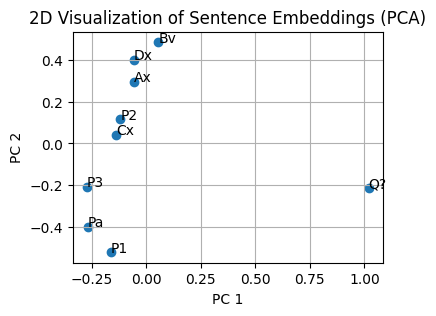

In [6]:
# Assumed Embeddings from section 4.Generate Embeddings for Sentences.
# Reduce to 2 dimensions using PCA
pca_2d = PCA(n_components=2)
reduced_embeddings_2d = pca_2d.fit_transform(embeddings)

# Visualize the 2D embeddings
plt.figure(figsize=(4, 3))
plt.scatter(reduced_embeddings_2d[:, 0], reduced_embeddings_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_2d[i, 0], reduced_embeddings_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

## 6. Reduce Dimensionality: 3D with PCA

### 6.1 3D PCA static

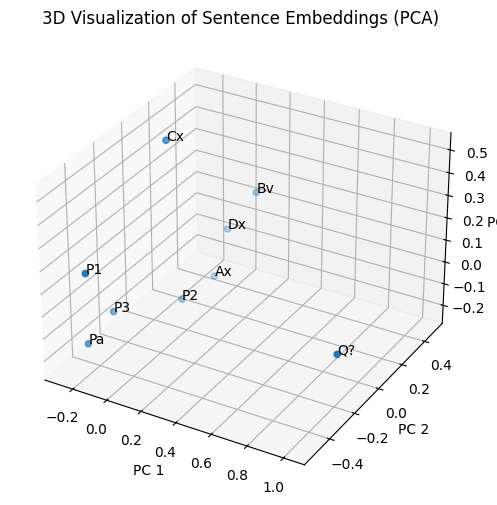

In [16]:
# Assumed Embeddings from section 4.Generate Embeddings for Sentences.
# Reduce to 3D using PCA
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(8, 6))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_3d[i, 0], reduced_embeddings_3d[i, 1], reduced_embeddings_3d[i, 2], txt[:2])

ax_3d.set_xlabel("PC 1")
ax_3d.set_ylabel("PC 2")
ax_3d.set_zlabel("PC 3")
ax_3d.set_title("3D Visualization of Sentence Embeddings (PCA)")
plt.show()

### 6.2 3D PCA rotational with P-tet

Question domain is illustrated in P-tet. Choices relation to Prompt-Question is shown by the distance from Choice to P-tet.

In [ ]:
# Assumed Embeddings from section 4.Generate Embeddings for Sentences.
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

labels = [s[:2] for s in sentences]  # Get first two letters.

# Perform PCA to reduce to 3 dimensions
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

# Directly define the indices, assuming P1, P2, P3, Q? are at indices 1, 2, 3, and 4
p1_index = 1
p2_index = 2
p3_index = 3
q_index = 4

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_embeddings_3d[p1_index]
p2_coords = reduced_embeddings_3d[p2_index]
p3_coords = reduced_embeddings_3d[p3_index]
q_coords = reduced_embeddings_3d[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}'
        )
    )

# Create the 3D scatter plot and add the lines
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    mode='markers+text',
    text=labels,  # Use first 2 characters of labels
    textposition="middle right",
    marker=dict(size=6),
    name='Data Points'
)] + lines)  # Combine scatter and lines

# Set the title and axis labels
fig.update_layout(
    title="3D PCA Visualization with Tetrahedron",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True
)

# Show the plot
fig.show()



### 6.3 P-sphere, P-tet, and Scatterplot

In [ ]:
# Assumed Embeddings from section 4.Generate Embeddings for Sentences.
# Sphere, tetrahedron, and scatterplot.
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

labels = [s[:2] for s in sentences]  # Get first two letters.

# Perform PCA to reduce to 3 dimensions
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

# Directly define the indices, assuming P1, P2, P3, Q? are at indices 1, 2, 3, and 4
p1_index = 1
p2_index = 2
p3_index = 3
q_index = 4

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_embeddings_3d[p1_index]
p2_coords = reduced_embeddings_3d[p2_index]
p3_coords = reduced_embeddings_3d[p3_index]
q_coords = reduced_embeddings_3d[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}'
        )
    )

# --- Start of new code for sphere calculation ---
# Points for sphere calculation
P = [p1_coords, p2_coords, p3_coords, q_coords]
x = [p[0] for p in P]
y = [p[1] for p in P]
z = [p[2] for p in P]

# System of equations to find sphere center (cx, cy, cz)
# (xi-cx)^2 + (yi-cy)^2 + (zi-cz)^2 = R^2
# Subtracting equation for P1 from P2, P3, P4:
# 2(x2-x1)cx + 2(y2-y1)cy + 2(z2-z1)cz = (x2^2+y2^2+z2^2) - (x1^2+y1^2+z1^2)
# ... and so on for P3 and P4

A = np.array([
    [2*(x[1]-x[0]), 2*(y[1]-y[0]), 2*(z[1]-z[0])],
    [2*(x[2]-x[0]), 2*(y[2]-y[0]), 2*(z[2]-z[0])],
    [2*(x[3]-x[0]), 2*(y[3]-y[0]), 2*(z[3]-z[0])]
])

B = np.array([
    (x[1]**2 + y[1]**2 + z[1]**2) - (x[0]**2 + y[0]**2 + z[0]**2),
    (x[2]**2 + y[2]**2 + z[2]**2) - (x[0]**2 + y[0]**2 + z[0]**2),
    (x[3]**2 + y[3]**2 + z[3]**2) - (x[0]**2 + y[0]**2 + z[0]**2)
])

try:
    sphere_center = np.linalg.solve(A, B)
    cx, cy, cz = sphere_center[0], sphere_center[1], sphere_center[2]
    sphere_radius = np.sqrt((x[0]-cx)**2 + (y[0]-cy)**2 + (z[0]-cz)**2)

    # Generate sphere surface points
    u = np.linspace(0, 2 * np.pi, 50) # Azimuthal angle
    v = np.linspace(0, np.pi, 25)    # Polar angle

    sphere_x = cx + sphere_radius * np.outer(np.cos(u), np.sin(v))
    sphere_y = cy + sphere_radius * np.outer(np.sin(u), np.sin(v))
    sphere_z = cz + sphere_radius * np.outer(np.ones(np.size(u)), np.cos(v)) # Corrected from np.ones_like(u) to np.ones(np.size(u))

    sphere_surface = go.Surface(
        x=sphere_x, y=sphere_y, z=sphere_z,
        opacity=0.3,
        colorscale='Blues', # You can choose other colorscales e.g. 'Viridis', 'RdBu'
        showscale=False, # Hide the color scale bar for the sphere
        name='Sphere'
    )
    sphere_added = True
except np.linalg.LinAlgError:
    print("Could not determine the sphere: Points might be coplanar or collinear.")
    sphere_surface = None # No sphere to add if calculation fails
    sphere_added = False
# --- End of new code for sphere calculation ---

# Create the 3D scatter plot and add the lines and sphere
data_elements = [go.Scatter3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    mode='markers+text',
    text=labels,  # Use first 2 characters of labels
    textposition="middle right",
    marker=dict(size=4),
    name='Data Points'
)] + lines

if sphere_added and sphere_surface:
    data_elements.append(sphere_surface)

fig = go.Figure(data=data_elements)


# Set the title and axis labels
fig.update_layout(
    title="3D PCA Visualization with Tetrahedron and Sphere",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
        # Aspect ratio to make the sphere look more like a sphere
        aspectmode='data' # 'auto', 'cube', 'data', 'manual'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True
)

# Show the plot
fig.show()

### 6.4 3D PCA from multiple angles static

In case rotational view above isn't available at temp environment, use multi-angle to illustrate.

In [ ]:
# Assumed Embeddings from section 4.Generate Embeddings for Sentences.
# PCA from multiple angles static views
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

#Create various angles for multiple 3-D rendering
elevations = [30, 30, 0, -30]  # Angles of elevation
azim_angles = [0, 45, 90, 135] # Azimuthal angles

for i, (elev, azim) in enumerate(zip(elevations, azim_angles)):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2])
    for j, txt in enumerate(sentences):
        ax.text(reduced_embeddings_3d[j, 0], reduced_embeddings_3d[j, 1], reduced_embeddings_3d[j, 2], txt[:2])
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_zlabel("PC 3")
    ax.view_init(elev=elev, azim=azim)
    plt.title(f"3D Plot (Elev={elev}, Azim={azim})")
    plt.show()

## 7. Using t-SNE for Dimensionality Reduction

**t-SNE** = t-distributed stochastic neighbor embedding. Unlike **PCA**, **t-SNE** demonstrate the embeddings in non-linear more scattered fashion.


### 7.1 2D t-SNE

In [ ]:
# 2D Scatterplot t-SNE
# Assumed Embeddings from section 4.Generate Embeddings for Sentences.
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2 dimensions using t-SNE with a lower perplexity
tsne_2d = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1)) # Set perplexity <= 5 or n_samples - 1
reduced_embeddings_tsne_2d = tsne_2d.fit_transform(embeddings)

# Visualize the 2D embeddings (t-SNE)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_tsne_2d[:, 0], reduced_embeddings_tsne_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_tsne_2d[i, 0], reduced_embeddings_tsne_2d[i, 1]))

plt.title("2D Scatterplot t-SNE")
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")
plt.grid(True)
plt.show()

###7.2 3D t-SNE static

In [ ]:
# 3D Scatterplot t-SNE
# 2D Scatterplot t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3 dimensions using t-SNE with a lower perplexity
tsne_3d = TSNE(n_components=3, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1))
reduced_embeddings_tsne_3d = tsne_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(4, 3))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_tsne_3d[:, 0], reduced_embeddings_tsne_3d[:, 1], reduced_embeddings_tsne_3d[:, 2])

# Annotate each point with the first letter of the sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_tsne_3d[i, 0], reduced_embeddings_tsne_3d[i, 1], reduced_embeddings_tsne_3d[i, 2], txt[:2])

ax_3d.set_xlabel("t-SNE D1")
ax_3d.set_ylabel("t-SNE D2")
ax_3d.set_zlabel("t-SNE D3")
ax_3d.set_title(" 3D Scatterplot t-SNE")
plt.show()

###7.3 3D t-SNE rotational

In [21]:
# 3D Scatterplot and Tetrehedron t-SNE rotational
# Assumed embeddings from Section 4. General Embeddings for Sentences
import plotly.graph_objects as go
import numpy as np
from sklearn.manifold import TSNE # Import TSNE
# from sklearn.decomposition import PCA # PCA is no longer needed for reduction

labels = [s[:2] for s in sentences]  # Get first two letters.

# Perform t-SNE to reduce to 3 dimensions
# Note: For t-SNE, perplexity should be less than the number of samples.
# For 9 samples, a perplexity like 2-5 is suitable.
# learning_rate='auto' and init='pca' are often good starting points.
# random_state is for reproducibility.
tsne_3d = TSNE(n_components=3, perplexity=4, learning_rate='auto', init='pca', n_iter=500, random_state=42)
reduced_embeddings_tsne_3d = tsne_3d.fit_transform(embeddings)

# Directly define the indices, assuming P1, P2, P3, Q? are at indices 1, 2, 3, and 4
# (This depends on the order in your 'sentences' and 'embeddings' data)
p1_index = 1 # Corresponds to "P1" if sentences[1] is "P1: ..."
p2_index = 2 # Corresponds to "P2"
p3_index = 3 # Corresponds to "P3"
q_index = 4 # Corresponds to "Q?"

# Extract the 3D coordinates of P1, P2, P3, and Q? from t-SNE results
p1_coords = reduced_embeddings_tsne_3d[p1_index]
p2_coords = reduced_embeddings_tsne_3d[p2_index]
p3_coords = reduced_embeddings_tsne_3d[p3_index]
q_coords = reduced_embeddings_tsne_3d[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices for the tetrahedron_vertices array)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from the first vertex (p1_coords) to others
    (1, 2), (1, 3),          # Edges from the second vertex (p2_coords)
    (2, 3)                   # Edge from the third vertex (p3_coords)
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_idx_in_tetra_array, end_idx_in_tetra_array) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_idx_in_tetra_array]
    end_point = tetrahedron_vertices[end_idx_in_tetra_array]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}'
        )
    )

# Create the 3D scatter plot and add the lines
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings_tsne_3d[:, 0],
    y=reduced_embeddings_tsne_3d[:, 1],
    z=reduced_embeddings_tsne_3d[:, 2],
    mode='markers+text',
    text=labels,  # Use first 2 characters of labels
    textposition="middle right",
    marker=dict(size=8),
    name='Data Points'
)] + lines)  # Combine scatter and lines

# Set the title and axis labels for t-SNE
fig.update_layout(
    title="3D Scatterplot t-SNE rotational", # Updated title
    scene=dict(
        xaxis_title="t-SNE D1", # Updated x-axis label
        yaxis_title="t-SNE D2", # Updated y-axis label
        zaxis_title="t-SNE D3", # Updated z-axis label
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True
)

# Show the plot
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [20]:
# 3D Scatterplot and tetrehedron t-SNE rotational
# Assumed embeddings from Section 4. General Embeddings for Sentences
import plotly.graph_objects as go
import numpy as np
from sklearn.manifold import TSNE

labels = [s[:2] for s in sentences] # get the first 2 letters for label scatterplot

# Function to find the sphere passing through 4 points
def get_sphere_coeffs(p1, p2, p3, p4):
    """
    Calculates the coefficients G, H, I, K for the sphere equation:
    x^2 + y^2 + z^2 + Gx + Hy + Iz + K = 0
    passing through four points p1, p2, p3, p4.
    Returns (G, H, I, K) or None if points are coplanar/collinear (matrix is singular).
    """
    points = np.array([p1, p2, p3, p4])
    A = np.zeros((4, 4))
    B = np.zeros(4)

    for i in range(4):
        A[i, 0] = points[i, 0]  # x
        A[i, 1] = points[i, 1]  # y
        A[i, 2] = points[i, 2]  # z
        A[i, 3] = 1             # K's coefficient
        B[i] = -(points[i, 0]**2 + points[i, 1]**2 + points[i, 2]**2) # -(x^2 + y^2 + z^2)

    try:
        coeffs = np.linalg.solve(A, B)
        return coeffs # G, H, I, K
    except np.linalg.LinAlgError:
        print("Points might be coplanar or collinear. Cannot uniquely define a sphere.")
        return None

def get_sphere_center_radius(G, H, I, K):
    """
    Calculates the center (cx, cy, cz) and radius R of a sphere
    given coefficients G, H, I, K from the equation:
    x^2 + y^2 + z^2 + Gx + Hy + Iz + K = 0
    """
    cx = -G / 2
    cy = -H / 2
    cz = -I / 2
    R_squared = (G**2 + H**2 + I**2) / 4 - K
    if R_squared < 0:
        print(f"Warning: R_squared is negative ({R_squared}). Something is wrong with the sphere calculation.")
        return (cx, cy, cz), 0 # Or handle error appropriately
    R = np.sqrt(R_squared)
    return (cx, cy, cz), R

# Perform t-SNE to reduce to 3 dimensions
# Adjust perplexity: must be less than n_samples
n_samples = embeddings.shape[0]
perplexity_value = min(30, n_samples - 1)
if perplexity_value <= 0 : # edge case for very few samples
    perplexity_value = max(1, n_samples -1)


tsne_3d = TSNE(n_components=3, random_state=42, perplexity=perplexity_value, n_iter=1000)
reduced_embeddings_tsne_3d = tsne_3d.fit_transform(embeddings)

# Directly define the indices
p1_index = 1
p2_index = 2
p3_index = 3
q_index = 4

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_embeddings_tsne_3d[p1_index]
p2_coords = reduced_embeddings_tsne_3d[p2_index]
p3_coords = reduced_embeddings_tsne_3d[p3_index]
q_coords = reduced_embeddings_tsne_3d[q_index]

# Define the vertices of the tetrahedron (these are the points for the sphere)
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# --- Sphere Calculation ---
sphere_coeffs = get_sphere_coeffs(p1_coords, p2_coords, p3_coords, q_coords)
sphere_trace = None

if sphere_coeffs is not None:
    G, H, I, K_val = sphere_coeffs
    (cx, cy, cz), R = get_sphere_center_radius(G, H, I, K_val)

    if R > 0: # Proceed only if radius is valid
        # Generate sphere surface points
        phi = np.linspace(0, np.pi, 50)
        theta = np.linspace(0, 2 * np.pi, 50)
        phi, theta = np.meshgrid(phi, theta)

        x_sphere = cx + R * np.sin(phi) * np.cos(theta)
        y_sphere = cy + R * np.sin(phi) * np.sin(theta)
        z_sphere = cz + R * np.cos(phi)

        sphere_trace = go.Surface(
            x=x_sphere, y=y_sphere, z=z_sphere,
            colorscale='Blues', # Or any other colorscale
            opacity=0.2,      # Make it semi-transparent
            showscale=False,  # Hide color scale for the sphere
            name='Sphere (P1-P2-P3-Q?)'
        )
    else:
        print(f"Sphere radius is {R}, not plotting sphere.")
else:
    print("Could not calculate sphere coefficients. Sphere will not be plotted.")
# --- End Sphere Calculation ---


# Define the edges of the tetrahedron (indices of vertices relative to tetrahedron_vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),
            name=f'Edge {i+1}'
        )
    )

# Create the 3D scatter plot
plot_data = [go.Scatter3d(
    x=reduced_embeddings_tsne_3d[:, 0],
    y=reduced_embeddings_tsne_3d[:, 1],
    z=reduced_embeddings_tsne_3d[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=8, color=np.arange(len(labels)), colorscale='Viridis'), # Color points for better distinction
    name='Data Points'
)] + lines

if sphere_trace:
    plot_data.append(sphere_trace)

fig = go.Figure(data=plot_data)

# Set the title and axis labels
fig.update_layout(
    title="3D t-SNE with Tetrahedron and Sphere",
    scene=dict(
        xaxis_title="t-SNE D1",
        yaxis_title="t-SNE D2",
        zaxis_title="t-SNE D3",
        aspectmode='data' # Important for sphere to look like a sphere
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True
)

# Show the plot
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



## 8. How about 5-Vs?

### 8.1 Initialized 5V (CL 1wk + DR 1wk)： CeO2-NPs

Below is a typical preception with inital training/ While erros exist across V2/V3/V4/V5, the student can vaguely see the correct answer Bv from the wrong choices Ax, Cx, and Dx.

5Vs---Pa---P1---P2---P3---Q?---Ax---Bv---Cx---Dx---

V1-----0-----1-----0------0-----1------0-----1-----0-----1---

V2-----1-----0----0.5---1------0-----0----0.5----0-----0---

V3-----1-----0----0.5---1-----1------1-----1-----1-----1---

V4-----0-----1-----0-----0-----1------0-----1----0.5----1---

V5-----0-----1-----0----0.5----0------0-----0-----0-----1---

In [ ]:
# Scatterplot and P-Tet: 5V-ini
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,0
P1,0,0,0,1,1
P2,0,0.5,0.5,0,0
P3,0,1,1,0,0.5
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0.5,1,1,0
Cx,0,0,1,0.5,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=4),
    name='Data Points'  # Add a name for the scatter plot
)

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}' # Add a name for each line.
        )
    )

# Combine scatter and lines
data = [scatter] + lines

# Set the title and axis labels
layout = go.Layout(
    title="Scatterplot and P-Tet: 5V-ini",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True #show legend
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot (this will display an interactive plot in Colab)
fig.show()


In [ ]:
# Scatterplot, P-Tet, and P-sphere: 5V-ini
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from io import StringIO

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,0
P1,0,0,0,1,1
P2,0,0.5,0.5,0,0
P3,0,1,1,0,0.5
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0.5,1,1,0
Cx,0,0,1,0.5,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron (also the points defining the sphere)
sphere_defining_points = [p1_coords, p2_coords, p3_coords, q_coords]
tetrahedron_vertices = np.array(sphere_defining_points)

# --- Functions to calculate sphere center and radius ---
def get_sphere_coeffs(p1, p2, p3, p4):
    """
    Calculates the coefficients A, B, C, D of the sphere equation:
    x^2 + y^2 + z^2 + Ax + By + Cz + D = 0
    passing through four points p1, p2, p3, p4.
    """
    points = np.array([p1, p2, p3, p4])
    # Form matrix M for the system M * [A, B, C, D]' = -[x^2+y^2+z^2]'
    M = np.ones((4, 4))
    M[:, 0] = points[:, 0]  # x coordinates
    M[:, 1] = points[:, 1]  # y coordinates
    M[:, 2] = points[:, 2]  # z coordinates

    # Right hand side vector
    rhs = -(points[:, 0]**2 + points[:, 1]**2 + points[:, 2]**2)

    try:
        # Solve for A, B, C, D
        coeffs = np.linalg.solve(M, rhs)
        return coeffs
    except np.linalg.LinAlgError:
        print("Error: The four points might be coplanar. Cannot determine a unique sphere.")
        return None

def calculate_sphere_center_radius(p1, p2, p3, p4):
    """
    Calculates the center and radius of a sphere passing through four points.
    p1, p2, p3, p4 are 3D points as NumPy arrays or lists [x, y, z].
    Returns (center, radius) or (None, None) if points are coplanar.
    """
    coeffs = get_sphere_coeffs(np.array(p1), np.array(p2), np.array(p3), np.array(p4))

    if coeffs is None:
        return None, None

    A, B, C, D_coeff = coeffs

    # Center (xc, yc, zc)
    xc = -A / 2
    yc = -B / 2
    zc = -C / 2
    center = np.array([xc, yc, zc])

    # Radius R
    # R^2 = xc^2 + yc^2 + zc^2 - D_coeff
    radius_sq = xc**2 + yc**2 + zc**2 - D_coeff
    if radius_sq < 0:
        print("Error: Calculated radius squared is negative (points might be collinear or an issue with PCA reduction).")
        return None, None
    radius = np.sqrt(radius_sq)

    return center, radius

# --- Function to generate Plotly sphere surface ---
def get_plotly_sphere_surface(center, radius, color='rgba(0,180,255,0.3)', resolution=50, name='Circumsphere'):
    """
    Generates Plotly go.Surface data for a sphere.
    center: NumPy array or list for the sphere's center [xc, yc, zc].
    radius: Radius of the sphere.
    color: Color of the sphere as an rgba string (e.g., 'rgba(R,G,B,A)').
    resolution: Number of points for theta and phi.
    name: Legend name for the sphere.
    """
    theta = np.linspace(0, 2 * np.pi, resolution)
    phi = np.linspace(0, np.pi, resolution)
    theta, phi = np.meshgrid(theta, phi)

    x = center[0] + radius * np.cos(theta) * np.sin(phi)
    y = center[1] + radius * np.sin(theta) * np.sin(phi)
    z = center[2] + radius * np.cos(phi)

    # To achieve a single color with opacity, we set the color directly in the colorscale
    # and ensure opacity is handled by the color string itself or the opacity property of go.Surface

    # Extract RGB from the rgba string if provided, default to a blue if format is unexpected
    try:
        rgb_color_part = color.split('(')[1].split(')')[0].split(',')
        r, g, b = rgb_color_part[0], rgb_color_part[1], rgb_color_part[2]
        plotly_color = f'rgb({r},{g},{b})'
        opacity_val = float(rgb_color_part[3]) if len(rgb_color_part) > 3 else 0.3
    except:
        plotly_color = 'rgb(0,180,255)' # Default blue
        opacity_val = 0.3

    return go.Surface(
        x=x, y=y, z=z,
        colorscale=[[0, plotly_color], [1, plotly_color]], # Solid color
        showscale=False,
        opacity=opacity_val,
        name=name,
        hoverinfo='skip' # Optional: disable hover for the sphere surface
    )

# --- Plotting ---

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=4, color='black'), # Changed marker color for better visibility against sphere
    name='Data Points'
)

# Define the edges of the tetrahedron
tetrahedron_edges_indices = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1
    (1, 2), (1, 3),          # Edges from P2
    (2, 3)                   # Edge from P3
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_idx, end_idx) in enumerate(tetrahedron_edges_indices):
    start_point = tetrahedron_vertices[start_idx]
    end_point = tetrahedron_vertices[end_idx]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=3),
            name=f'Tetrahedron Edge' # Simplified name
        )
    )
# To avoid multiple "Tetrahedron Edge" legends, only the first one will show by default if names are identical.
# Or, make them unique if needed, or group them. For simplicity, keep as is or assign name to only one.
if lines:
    lines[0].showlegend = True # Show legend for the first edge only as representative
    for line_trace in lines[1:]:
        line_trace.showlegend = False


# Calculate sphere center and radius using the PCA-reduced coordinates
sphere_center, sphere_radius = calculate_sphere_center_radius(p1_coords, p2_coords, p3_coords, q_coords)

# Initialize data list for the figure
data_traces = [scatter] + lines

# Add sphere to the plot if calculation was successful
sphere_trace = None
if sphere_center is not None and sphere_radius is not None:
    print(f"Sphere Center (PCA coords): {sphere_center}")
    print(f"Sphere Radius (PCA coords): {sphere_radius}")
    sphere_trace = get_plotly_sphere_surface(
        sphere_center,
        sphere_radius,
        color='rgba(100, 180, 255, 0.3)', # Light blue, semi-transparent
        resolution=40, # Lower resolution for faster rendering, increase for smoother sphere
        name='Circumsphere P1-P2-P3-Q?'
    )
    data_traces.append(sphere_trace)
else:
    print("Could not calculate sphere parameters. Sphere will not be plotted.")


# Set the title and axis labels
layout = go.Layout(
    title="Scatterplot, P-Tet, and P-sphere: 5V-ini",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
        aspectmode='data' # 'data', 'cube', 'auto', 'manual'
                         # 'data' ensures that the scaling of axes matches the data range
                         # 'cube' makes the plot region a cube
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True
)

# Create the figure
fig = go.Figure(data=data_traces, layout=layout)

# Show the plot
fig.show()

In [ ]:
# Scatterplot, P-Tet, and Max-Cos-Vec-PCA: 5V_ini
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from io import StringIO
from sklearn.metrics.pairwise import cosine_similarity

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,0
P1,0,0,0,1,1
P2,0,0.5,0.5,0,0
P3,0,1,1,0,0.5
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0.5,1,1,0
Cx,0,0,1,0.5,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# --- Coordinate Extraction ---
pa_index = labels.index('Pa')
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')
ax_index = labels.index('Ax')
bv_index = labels.index('Bv')
cx_index = labels.index('Cx')
dx_index = labels.index('Dx')

pa_coords = reduced_data[pa_index]
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]
ax_coords = reduced_data[ax_index]
bv_coords = reduced_data[bv_index]
cx_coords = reduced_data[cx_index]
dx_coords = reduced_data[dx_index]

# --- Plotting Code Setup ---
data_plot = [] # Initialize list for all plot traces

# Scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0], y=reduced_data[:, 1], z=reduced_data[:, 2],
    mode='markers+text', text=labels, textposition="middle right",
    marker=dict(size=4, color='blue'), name='Data Points'
)
data_plot.append(scatter)

# Tetrahedron edges
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])
tetrahedron_edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
tetra_lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    tetra_lines.append(go.Scatter3d(
        x=[start_point[0], end_point[0]], y=[start_point[1], end_point[1]], z=[start_point[2], end_point[2]],
        mode='lines', line=dict(color='red', width=3), name=f'Tetra Edge {i+1}', hoverinfo='none'
    ))
data_plot.extend(tetra_lines)

# Initial five vectors (Pa, P1, P2, P3, Q)
vector_points_coords_for_plot = {'Pa': pa_coords, 'P1': p1_coords, 'P2': p2_coords, 'P3': p3_coords, 'Q': q_coords}
origin_plot = np.array([0, 0, 0])
initial_vector_color = 'green'
vector_line_width_plot = 4
cone_sizeref_plot = 0.2  # Adjust as needed

for label, p_coords_arr in vector_points_coords_for_plot.items():
    p_coords_plot = np.array(p_coords_arr)
    # Shaft
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], p_coords_plot[0]], y=[origin_plot[1], p_coords_plot[1]], z=[origin_plot[2], p_coords_plot[2]],
        mode='lines', line=dict(color=initial_vector_color, width=vector_line_width_plot),
        name=f'Vector to {label} (shaft)', hoverinfo='name'
    ))
    # Head
    u_plot, v_plot, w_plot = p_coords_plot - origin_plot
    data_plot.append(go.Cone(
        x=[p_coords_plot[0]], y=[p_coords_plot[1]], z=[p_coords_plot[2]],
        u=[u_plot], v=[v_plot], w=[w_plot],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, initial_vector_color], [1, initial_vector_color]], anchor="tip",
        name=f'Vector to {label} (head)', hoverinfo='name'
    ))

# --- Cosine Similarity Calculation ---
print("\n--- Cosine Similarity Calculation ---")
vec_ax = ax_coords.reshape(1, -1)
vec_bv = bv_coords.reshape(1, -1)
vec_cx = cx_coords.reshape(1, -1)
vec_dx = dx_coords.reshape(1, -1)

# Store coordinates for Ax, Bv, Cx, Dx for easy lookup later
coords_map = {
    "Ax": ax_coords,
    "Bv": bv_coords,
    "Cx": cx_coords,
    "Dx": dx_coords
}
vectors_to_check_for_sim = {
    "Ax": vec_ax,
    "Bv": vec_bv,
    "Cx": vec_cx,
    "Dx": vec_dx
}

target_vector_label = "Pa"
target_vector_coords_for_sim = pa_coords.reshape(1, -1)

print(f"Calculating cosine similarity with respect to vector: {target_vector_label} (coordinates: {target_vector_coords_for_sim.flatten()})")

max_similarity = -2
vector_label_with_max_similarity = None

for label, vec in vectors_to_check_for_sim.items():
    similarity = cosine_similarity(vec, target_vector_coords_for_sim)[0][0]
    print(f"Cosine similarity between {label} and {target_vector_label}: {similarity:.4f}")
    if similarity > max_similarity:
        max_similarity = similarity
        vector_label_with_max_similarity = label

if vector_label_with_max_similarity:
    print(f"\nThe vector from (Ax, Bv, Cx, Dx) with the maximal cosine similarity to {target_vector_label} is: {vector_label_with_max_similarity}")
    print(f"Maximal cosine similarity: {max_similarity:.4f}")

    # --- Plot the vector with maximal cosine similarity ---
    max_sim_coords = coords_map[vector_label_with_max_similarity]
    max_sim_vector_color = 'magenta' # Distinct color for this vector

    print(f"Plotting maximal similarity vector: {vector_label_with_max_similarity} with color {max_sim_vector_color}")

    # Shaft for max similarity vector
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], max_sim_coords[0]],
        y=[origin_plot[1], max_sim_coords[1]],
        z=[origin_plot[2], max_sim_coords[2]],
        mode='lines',
        line=dict(color=max_sim_vector_color, width=vector_line_width_plot + 1), # Slightly thicker
        name=f'Max Sim. to Pa: {vector_label_with_max_similarity} (shaft)',
        hoverinfo='name'
    ))
    # Head for max similarity vector
    u_max_sim, v_max_sim, w_max_sim = max_sim_coords - origin_plot
    data_plot.append(go.Cone(
        x=[max_sim_coords[0]], y=[max_sim_coords[1]], z=[max_sim_coords[2]],
        u=[u_max_sim], v=[v_max_sim], w=[w_max_sim],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, max_sim_vector_color], [1, max_sim_vector_color]], anchor="tip",
        name=f'Max Sim. to Pa: {vector_label_with_max_similarity} (head)',
        hoverinfo='name'
    ))
else:
    print("\nCould not determine the vector with maximal cosine similarity (check inputs), so not plotting it.")
# --- End of Cosine Similarity Calculation & Plotting Max Sim Vector ---

# --- Create and Show Plot ---
layout = go.Layout(
    title="Scatterplot, P-Tet, and Max-Cos-Vec-PCA: 5V_ini",
    scene=dict(
        xaxis_title="PC 1", yaxis_title="PC 2", zaxis_title="PC 3",
        aspectmode='data',
        camera_eye=dict(x=1.8, y=1.8, z=0.5)
    ),
    margin=dict(l=0, r=0, b=0, t=50), # Adjusted top margin for longer title
    showlegend=True
)
fig = go.Figure(data=data_plot, layout=layout)
fig.show()

In [ ]:
# Scatterplot, P-Tet, and Max_Cos_Vec_5V: 5V-ini
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from io import StringIO
from sklearn.metrics.pairwise import cosine_similarity

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,0
P1,0,0,0,1,1
P2,0,0.5,0.5,0,0
P3,0,1,1,0,0.5
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0.5,1,1,0
Cx,0,0,1,0.5,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA AND for 5D similarity (exclude the 'datapoint' column)
# X_5d is the original 5-dimensional data
X_5d = df.iloc[:, 1:].values

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# --- 1. Cosine Similarity Calculation using Original 5D Data ---
print("\n--- 5D Cosine Similarity Calculation (Finding MAXIMAL Similarity) ---")

# Get indices for the relevant data points
pa_5d_index = labels.index('Pa')
ax_5d_index = labels.index('Ax')
bv_5d_index = labels.index('Bv')
cx_5d_index = labels.index('Cx')
dx_5d_index = labels.index('Dx')

# Extract 5D vectors
pa_vec_5d = X_5d[pa_5d_index].reshape(1, -1)
ax_vec_5d = X_5d[ax_5d_index].reshape(1, -1)
bv_vec_5d = X_5d[bv_5d_index].reshape(1, -1)
cx_vec_5d = X_5d[cx_5d_index].reshape(1, -1)
dx_vec_5d = X_5d[dx_5d_index].reshape(1, -1)

vectors_to_check_5d = {
    "Ax": ax_vec_5d,
    "Bv": bv_vec_5d,
    "Cx": cx_vec_5d,
    "Dx": dx_vec_5d
}

target_vector_label_5d = "Pa"
print(f"Calculating 5D cosine similarity with respect to vector: {target_vector_label_5d} (5D coords: {pa_vec_5d.flatten()})")

# Initialize for finding MAXIMAL similarity
max_similarity_5d = -2.0 # Cosine similarity ranges from -1 to 1, so -2 is a safe lower bound for max
vector_label_with_max_similarity_5d = None

for label_5d, vec_5d in vectors_to_check_5d.items():
    similarity_5d = cosine_similarity(vec_5d, pa_vec_5d)[0][0]
    print(f"5D Cosine similarity between {label_5d} and {target_vector_label_5d}: {similarity_5d:.4f}")
    # Check for MAXIMAL similarity
    if similarity_5d > max_similarity_5d:
        max_similarity_5d = similarity_5d
        vector_label_with_max_similarity_5d = label_5d

if vector_label_with_max_similarity_5d:
    print(f"\nThe vector (from 5D data) with the MAXIMAL cosine similarity to {target_vector_label_5d} is: {vector_label_with_max_similarity_5d}")
    print(f"Maximal 5D cosine similarity: {max_similarity_5d:.4f}")
else:
    print("\nCould not determine the vector with maximal 5D cosine similarity.")


# --- 2. Perform PCA for 3D Plotting ---
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(X_5d) # PCA on the same 5D data

# --- 3. Coordinate Extraction for 3D Plotting ---
pa_coords_3d = reduced_data_3d[pa_5d_index] # Use original indices
p1_coords_3d = reduced_data_3d[labels.index('P1')]
p2_coords_3d = reduced_data_3d[labels.index('P2')]
p3_coords_3d = reduced_data_3d[labels.index('P3')]
q_coords_3d = reduced_data_3d[labels.index('Q?')] # Assuming 'Q?' is the label for Q
ax_coords_3d = reduced_data_3d[ax_5d_index] # Use original indices
bv_coords_3d = reduced_data_3d[bv_5d_index]
cx_coords_3d = reduced_data_3d[cx_5d_index]
dx_coords_3d = reduced_data_3d[dx_5d_index]

# Store 3D coordinates for easy lookup for plotting the special vector
coords_map_3d = {
    "Pa": pa_coords_3d, "P1": p1_coords_3d, "P2": p2_coords_3d, "P3": p3_coords_3d, "Q?": q_coords_3d,
    "Ax": ax_coords_3d, "Bv": bv_coords_3d, "Cx": cx_coords_3d, "Dx": dx_coords_3d
}

# --- 4. Plotting Code Setup ---
data_plot = []
origin_plot = np.array([0, 0, 0])
vector_line_width_plot = 4
cone_sizeref_plot = 0.2

# Scatter plot for all points (using 3D PCA data)
scatter = go.Scatter3d(
    x=reduced_data_3d[:, 0], y=reduced_data_3d[:, 1], z=reduced_data_3d[:, 2],
    mode='markers+text', text=labels, textposition="middle right",
    marker=dict(size=4, color='blue'), name='Data Points'
)
data_plot.append(scatter)

# Tetrahedron edges (using 3D PCA data for P1, P2, P3, Q)
# Corrected label for Q in initial_vector_points_3d if it's 'Q?'
tetrahedron_vertices_3d = np.array([p1_coords_3d, p2_coords_3d, p3_coords_3d, q_coords_3d])
tetrahedron_edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
tetra_lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices_3d[start_index]
    end_point = tetrahedron_vertices_3d[end_index]
    tetra_lines.append(go.Scatter3d(
        x=[start_point[0], end_point[0]], y=[start_point[1], end_point[1]], z=[start_point[2], end_point[2]],
        mode='lines', line=dict(color='red', width=3), name=f'Tetra Edge {i+1}', hoverinfo='none'
    ))
data_plot.extend(tetra_lines)

# Initial five vectors (Pa, P1, P2, P3, Q) using their 3D PCA coordinates
# Ensuring 'Q?' label is used if that's how Q is defined in initial_vector_points_3d key
initial_vector_points_3d = {'Pa': pa_coords_3d, 'P1': p1_coords_3d, 'P2': p2_coords_3d, 'P3': p3_coords_3d, 'Q?': q_coords_3d}
initial_vector_color = 'green'

for label, p_coords_3d_arr in initial_vector_points_3d.items():
    # Shaft
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], p_coords_3d_arr[0]], y=[origin_plot[1], p_coords_3d_arr[1]], z=[origin_plot[2], p_coords_3d_arr[2]],
        mode='lines', line=dict(color=initial_vector_color, width=vector_line_width_plot),
        name=f'Vector to {label} (3D PCA shaft)', hoverinfo='name'
    ))
    # Head
    u_plot, v_plot, w_plot = p_coords_3d_arr - origin_plot
    data_plot.append(go.Cone(
        x=[p_coords_3d_arr[0]], y=[p_coords_3d_arr[1]], z=[p_coords_3d_arr[2]],
        u=[u_plot], v=[v_plot], w=[w_plot],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, initial_vector_color], [1, initial_vector_color]], anchor="tip",
        name=f'Vector to {label} (3D PCA head)', hoverinfo='name'
    ))

# Plot the vector identified via 5D MAXIMAL similarity, using its 3D PCA coordinates
if vector_label_with_max_similarity_5d:
    max_sim_point_label = vector_label_with_max_similarity_5d
    max_sim_point_coords_3d = coords_map_3d[max_sim_point_label] # Get its 3D PCA coordinates
    max_sim_vector_color = 'orange' # Distinct color for MAXIMAL similarity vector

    print(f"Plotting vector for '{max_sim_point_label}' (max 5D sim to Pa) using its 3D PCA coords, color {max_sim_vector_color}")

    # Shaft for max similarity vector (using its 3D PCA coords)
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], max_sim_point_coords_3d[0]],
        y=[origin_plot[1], max_sim_point_coords_3d[1]],
        z=[origin_plot[2], max_sim_point_coords_3d[2]],
        mode='lines',
        line=dict(color=max_sim_vector_color, width=vector_line_width_plot + 1), # Slightly thicker
        name=f'Max 5D Sim. to Pa: {max_sim_point_label} (3D PCA shaft)',
        hoverinfo='name'
    ))
    # Head for max similarity vector (using its 3D PCA coords)
    u_max_sim, v_max_sim, w_max_sim = max_sim_point_coords_3d - origin_plot
    data_plot.append(go.Cone(
        x=[max_sim_point_coords_3d[0]], y=[max_sim_point_coords_3d[1]], z=[max_sim_point_coords_3d[2]],
        u=[u_max_sim], v=[v_max_sim], w=[w_max_sim],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, max_sim_vector_color], [1, max_sim_vector_color]], anchor="tip",
        name=f'Max 5D Sim. to Pa: {max_sim_point_label} (3D PCA head)',
        hoverinfo='name'
    ))
else:
    print("\nNo maximal similarity vector identified from 5D data to plot.")

# --- Create and Show Plot ---
layout = go.Layout(
    title="Scatterplot, P-Tet, and Max_Cos_Vec_5V: 5V-ini",
    scene=dict(
        xaxis_title="PC 1", yaxis_title="PC 2", zaxis_title="PC 3",
        aspectmode='data',
        camera_eye=dict(x=1.8, y=1.8, z=0.5)
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True
)
fig = go.Figure(data=data_plot, layout=layout)
fig.show()

### 8.2 Well-Trained 5Vs: CL 1wk + DP/BT>=1month

Below is a typical preception with 1+month training. Correct answer falls directly into the prompt/question subspace.

5Vs---Pa---P1---P2---P3---Q?---Ax---Bv---Cx---Dx---

V1-----0-----1-----0------0-----1------0-----1-----0-----1---

V2-----1-----0-----1-----1------0------0-----0-----0-----0---

V3-----1-----0-----1------1-----1------1-----1-----1-----1---

V4-----0-----1-----0-----0-----1------0------1-----1-----1---

V5-----0-----1-----0-----1-----0------0------0-----0-----1---

In [ ]:
# Scaterplot and P-Tet: 5V-fin
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,1
P1,1,0,0,1,1
P2,0,1,1,0,0
P3,0,1,1,0,1
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0,1,1,0
Cx,0,0,1,1,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=4),
    name='Data Points'  # Add a name for the scatter plot
)

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}' # Add a name for each line.
        )
    )

# Combine scatter and lines
data = [scatter] + lines

# Set the title and axis labels
layout = go.Layout(
    title="Scaterplot and P-Tet: 5V-fin",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True #show legend
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot (this will display an interactive plot in Colab)
fig.show()


In [ ]:
# Scatterplot, P-Tet, and P-sphere: 5V-fin
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from io import StringIO

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,1
P1,1,0,0,1,1
P2,0,1,1,0,0
P3,0,1,1,0,1
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0,1,1,0
Cx,0,0,1,1,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron (also the points defining the sphere)
sphere_defining_points = [p1_coords, p2_coords, p3_coords, q_coords]
tetrahedron_vertices = np.array(sphere_defining_points)

# --- Functions to calculate sphere center and radius ---
def get_sphere_coeffs(p1, p2, p3, p4):
    """
    Calculates the coefficients A, B, C, D of the sphere equation:
    x^2 + y^2 + z^2 + Ax + By + Cz + D = 0
    passing through four points p1, p2, p3, p4.
    """
    points = np.array([p1, p2, p3, p4])
    # Form matrix M for the system M * [A, B, C, D]' = -[x^2+y^2+z^2]'
    M = np.ones((4, 4))
    M[:, 0] = points[:, 0]  # x coordinates
    M[:, 1] = points[:, 1]  # y coordinates
    M[:, 2] = points[:, 2]  # z coordinates

    # Right hand side vector
    rhs = -(points[:, 0]**2 + points[:, 1]**2 + points[:, 2]**2)

    try:
        # Solve for A, B, C, D
        coeffs = np.linalg.solve(M, rhs)
        return coeffs
    except np.linalg.LinAlgError:
        print("Error: The four points might be coplanar. Cannot determine a unique sphere.")
        return None

def calculate_sphere_center_radius(p1, p2, p3, p4):
    """
    Calculates the center and radius of a sphere passing through four points.
    p1, p2, p3, p4 are 3D points as NumPy arrays or lists [x, y, z].
    Returns (center, radius) or (None, None) if points are coplanar.
    """
    coeffs = get_sphere_coeffs(np.array(p1), np.array(p2), np.array(p3), np.array(p4))

    if coeffs is None:
        return None, None

    A, B, C, D_coeff = coeffs

    # Center (xc, yc, zc)
    xc = -A / 2
    yc = -B / 2
    zc = -C / 2
    center = np.array([xc, yc, zc])

    # Radius R
    # R^2 = xc^2 + yc^2 + zc^2 - D_coeff
    radius_sq = xc**2 + yc**2 + zc**2 - D_coeff
    if radius_sq < 0:
        print("Error: Calculated radius squared is negative (points might be collinear or an issue with PCA reduction).")
        return None, None
    radius = np.sqrt(radius_sq)

    return center, radius

# --- Function to generate Plotly sphere surface ---
def get_plotly_sphere_surface(center, radius, color='rgba(0,180,255,0.3)', resolution=50, name='Circumsphere'):
    """
    Generates Plotly go.Surface data for a sphere.
    center: NumPy array or list for the sphere's center [xc, yc, zc].
    radius: Radius of the sphere.
    color: Color of the sphere as an rgba string (e.g., 'rgba(R,G,B,A)').
    resolution: Number of points for theta and phi.
    name: Legend name for the sphere.
    """
    theta = np.linspace(0, 2 * np.pi, resolution)
    phi = np.linspace(0, np.pi, resolution)
    theta, phi = np.meshgrid(theta, phi)

    x = center[0] + radius * np.cos(theta) * np.sin(phi)
    y = center[1] + radius * np.sin(theta) * np.sin(phi)
    z = center[2] + radius * np.cos(phi)

    # To achieve a single color with opacity, we set the color directly in the colorscale
    # and ensure opacity is handled by the color string itself or the opacity property of go.Surface

    # Extract RGB from the rgba string if provided, default to a blue if format is unexpected
    try:
        rgb_color_part = color.split('(')[1].split(')')[0].split(',')
        r, g, b = rgb_color_part[0], rgb_color_part[1], rgb_color_part[2]
        plotly_color = f'rgb({r},{g},{b})'
        opacity_val = float(rgb_color_part[3]) if len(rgb_color_part) > 3 else 0.3
    except:
        plotly_color = 'rgb(0,180,255)' # Default blue
        opacity_val = 0.3

    return go.Surface(
        x=x, y=y, z=z,
        colorscale=[[0, plotly_color], [1, plotly_color]], # Solid color
        showscale=False,
        opacity=opacity_val,
        name=name,
        hoverinfo='skip' # Optional: disable hover for the sphere surface
    )

# --- Plotting ---

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=4, color='black'), # Changed marker color for better visibility against sphere
    name='Data Points'
)

# Define the edges of the tetrahedron
tetrahedron_edges_indices = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1
    (1, 2), (1, 3),          # Edges from P2
    (2, 3)                   # Edge from P3
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_idx, end_idx) in enumerate(tetrahedron_edges_indices):
    start_point = tetrahedron_vertices[start_idx]
    end_point = tetrahedron_vertices[end_idx]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=3),
            name=f'Tetrahedron Edge' # Simplified name
        )
    )
# To avoid multiple "Tetrahedron Edge" legends, only the first one will show by default if names are identical.
# Or, make them unique if needed, or group them. For simplicity, keep as is or assign name to only one.
if lines:
    lines[0].showlegend = True # Show legend for the first edge only as representative
    for line_trace in lines[1:]:
        line_trace.showlegend = False


# Calculate sphere center and radius using the PCA-reduced coordinates
sphere_center, sphere_radius = calculate_sphere_center_radius(p1_coords, p2_coords, p3_coords, q_coords)

# Initialize data list for the figure
data_traces = [scatter] + lines

# Add sphere to the plot if calculation was successful
sphere_trace = None
if sphere_center is not None and sphere_radius is not None:
    print(f"Sphere Center (PCA coords): {sphere_center}")
    print(f"Sphere Radius (PCA coords): {sphere_radius}")
    sphere_trace = get_plotly_sphere_surface(
        sphere_center,
        sphere_radius,
        color='rgba(100, 180, 255, 0.3)', # Light blue, semi-transparent
        resolution=40, # Lower resolution for faster rendering, increase for smoother sphere
        name='Circumsphere P1-P2-P3-Q?'
    )
    data_traces.append(sphere_trace)
else:
    print("Could not calculate sphere parameters. Sphere will not be plotted.")


# Set the title and axis labels
layout = go.Layout(
    title="Scatterplot, P-Tet, and P-sphere: 5V-fin",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
        aspectmode='data' # 'data', 'cube', 'auto', 'manual'
                         # 'data' ensures that the scaling of axes matches the data range
                         # 'cube' makes the plot region a cube
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True
)

# Create the figure
fig = go.Figure(data=data_traces, layout=layout)

# Show the plot
fig.show()

In [ ]:
# Scaterplot, P-Tet, and Max_Cos_Vec_5V: 5V-fin
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from io import StringIO

# Your new data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,1
P1,1,0,0,1,1
P2,0,1,1,0,0
P3,0,1,1,0,1
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0,1,1,0
Cx,0,0,1,1,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA AND for 5D similarity (exclude the 'datapoint' column)
# X_5d is the original 5-dimensional data
X_5d = df.iloc[:, 1:].values

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# --- 1. Cosine Similarity Calculation using Original 5D Data ---
print("\n--- 5D Cosine Similarity Calculation ---")

# Get indices for the relevant data points
pa_5d_index = labels.index('Pa')
ax_5d_index = labels.index('Ax')
bv_5d_index = labels.index('Bv')
cx_5d_index = labels.index('Cx')
dx_5d_index = labels.index('Dx')

# Extract 5D vectors
pa_vec_5d = X_5d[pa_5d_index].reshape(1, -1)
ax_vec_5d = X_5d[ax_5d_index].reshape(1, -1)
bv_vec_5d = X_5d[bv_5d_index].reshape(1, -1)
cx_vec_5d = X_5d[cx_5d_index].reshape(1, -1)
dx_vec_5d = X_5d[dx_5d_index].reshape(1, -1)

vectors_to_check_5d = {
    "Ax": ax_vec_5d,
    "Bv": bv_vec_5d,
    "Cx": cx_vec_5d,
    "Dx": dx_vec_5d
}

target_vector_label_5d = "Pa"
print(f"Calculating 5D cosine similarity with respect to vector: {target_vector_label_5d} (5D coords: {pa_vec_5d.flatten()})")

max_similarity_5d = -2.0 # Cosine similarity ranges from -1 to 1, so 2 is a safe upper bound for max
vector_label_with_max_similarity_5d = None

for label_5d, vec_5d in vectors_to_check_5d.items():
    similarity_5d = cosine_similarity(vec_5d, pa_vec_5d)[0][0]
    print(f"5D Cosine similarity between {label_5d} and {target_vector_label_5d}: {similarity_5d:.4f}")
    if similarity_5d > max_similarity_5d:
        max_similarity_5d = similarity_5d
        vector_label_with_max_similarity_5d = label_5d

if vector_label_with_max_similarity_5d:
    print(f"\nThe vector (from 5D data) with the MAXIMAL cosine similarity to {target_vector_label_5d} is: {vector_label_with_max_similarity_5d}")
    print(f"Maximal 5D cosine similarity: {max_similarity_5d:.4f}")
else:
    print("\nCould not determine the vector with maximal 5D cosine similarity.")


# --- 2. Perform PCA for 3D Plotting ---
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(X_5d) # PCA on the same 5D data

# --- 3. Coordinate Extraction for 3D Plotting ---
pa_coords_3d = reduced_data_3d[pa_5d_index] # Use original indices
p1_coords_3d = reduced_data_3d[labels.index('P1')]
p2_coords_3d = reduced_data_3d[labels.index('P2')]
p3_coords_3d = reduced_data_3d[labels.index('P3')]
q_coords_3d = reduced_data_3d[labels.index('Q?')]
ax_coords_3d = reduced_data_3d[ax_5d_index] # Use original indices
bv_coords_3d = reduced_data_3d[bv_5d_index]
cx_coords_3d = reduced_data_3d[cx_5d_index]
dx_coords_3d = reduced_data_3d[dx_5d_index]

# Store 3D coordinates for easy lookup for plotting the special vector
coords_map_3d = {
    "Pa": pa_coords_3d, "P1": p1_coords_3d, "P2": p2_coords_3d, "P3": p3_coords_3d, "Q?": q_coords_3d,
    "Ax": ax_coords_3d, "Bv": bv_coords_3d, "Cx": cx_coords_3d, "Dx": dx_coords_3d
}

# --- 4. Plotting Code Setup ---
data_plot = []
origin_plot = np.array([0, 0, 0])
vector_line_width_plot = 4
cone_sizeref_plot = 0.2

# Scatter plot for all points (using 3D PCA data)
scatter = go.Scatter3d(
    x=reduced_data_3d[:, 0], y=reduced_data_3d[:, 1], z=reduced_data_3d[:, 2],
    mode='markers+text', text=labels, textposition="middle right",
    marker=dict(size=4, color='blue'), name='Data Points'
)
data_plot.append(scatter)

# Tetrahedron edges (using 3D PCA data for P1, P2, P3, Q)
tetrahedron_vertices_3d = np.array([p1_coords_3d, p2_coords_3d, p3_coords_3d, q_coords_3d])
tetrahedron_edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
tetra_lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices_3d[start_index]
    end_point = tetrahedron_vertices_3d[end_index]
    tetra_lines.append(go.Scatter3d(
        x=[start_point[0], end_point[0]], y=[start_point[1], end_point[1]], z=[start_point[2], end_point[2]],
        mode='lines', line=dict(color='red', width=3), name=f'Tetra Edge {i+1}', hoverinfo='none'
    ))
data_plot.extend(tetra_lines)

# Initial five vectors (Pa, P1, P2, P3, Q) using their 3D PCA coordinates
initial_vector_points_3d = {'Pa': pa_coords_3d, 'P1': p1_coords_3d, 'P2': p2_coords_3d, 'P3': p3_coords_3d, 'Q': q_coords_3d}
initial_vector_color = 'green'

for label, p_coords_3d_arr in initial_vector_points_3d.items():
    # Shaft
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], p_coords_3d_arr[0]], y=[origin_plot[1], p_coords_3d_arr[1]], z=[origin_plot[2], p_coords_3d_arr[2]],
        mode='lines', line=dict(color=initial_vector_color, width=vector_line_width_plot),
        name=f'Vector to {label} (3D PCA shaft)', hoverinfo='name'
    ))
    # Head
    u_plot, v_plot, w_plot = p_coords_3d_arr - origin_plot
    data_plot.append(go.Cone(
        x=[p_coords_3d_arr[0]], y=[p_coords_3d_arr[1]], z=[p_coords_3d_arr[2]],
        u=[u_plot], v=[v_plot], w=[w_plot],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, initial_vector_color], [1, initial_vector_color]], anchor="tip",
        name=f'Vector to {label} (3D PCA head)', hoverinfo='name'
    ))

# Plot the vector identified via 5D maximal similarity, using its 3D PCA coordinates
if vector_label_with_max_similarity_5d:
    max_sim_point_label = vector_label_with_max_similarity_5d
    max_sim_point_coords_3d = coords_map_3d[max_sim_point_label] # Get its 3D PCA coordinates
    max_sim_vector_color = 'purple' # Distinct color

    print(f"Plotting vector for '{max_sim_point_label}' (max 5D sim to Pa) using its 3D PCA coords, color {max_sim_vector_color}")

    # Shaft for max similarity vector (using its 3D PCA coords)
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], max_sim_point_coords_3d[0]],
        y=[origin_plot[1], max_sim_point_coords_3d[1]],
        z=[origin_plot[2], max_sim_point_coords_3d[2]],
        mode='lines',
        line=dict(color=max_sim_vector_color, width=vector_line_width_plot + 1), # Slightly thicker
        name=f'Max 5D Sim. to Pa: {max_sim_point_label} (3D PCA shaft)',
        hoverinfo='name'
    ))
    # Head for max similarity vector (using its 3D PCA coords)
    u_max_sim, v_max_sim, w_max_sim = max_sim_point_coords_3d - origin_plot
    data_plot.append(go.Cone(
        x=[max_sim_point_coords_3d[0]], y=[max_sim_point_coords_3d[1]], z=[max_sim_point_coords_3d[2]],
        u=[u_max_sim], v=[v_max_sim], w=[w_max_sim],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, max_sim_vector_color], [1, max_sim_vector_color]], anchor="tip",
        name=f'Max 5D Sim. to Pa: {max_sim_point_label} (3D PCA head)',
        hoverinfo='name'
    ))
else:
    print("\nNo maximal similarity vector identified from 5D data to plot.")

# --- Create and Show Plot ---
layout = go.Layout(
    title="Scaterplot, P-Tet, and Max_Cos_Vec_5V: 5V-fin",
    scene=dict(
        xaxis_title="PC 1", yaxis_title="PC 2", zaxis_title="PC 3",
        aspectmode='data',
        camera_eye=dict(x=1.8, y=1.8, z=0.5)
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=True
)
fig = go.Figure(data=data_plot, layout=layout)
fig.show()

In [ ]:
# Scatterplot, P-Tet, and Max_Cos_Vec_PCA: 5V-fin
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from io import StringIO
from sklearn.metrics.pairwise import cosine_similarity

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,1
P1,1,0,0,1,1
P2,0,1,1,0,0
P3,0,1,1,0,1
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0,1,1,0
Cx,0,0,1,1,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# --- Coordinate Extraction ---
pa_index = labels.index('Pa')
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')
ax_index = labels.index('Ax')
bv_index = labels.index('Bv')
cx_index = labels.index('Cx')
dx_index = labels.index('Dx')

pa_coords = reduced_data[pa_index]
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]
ax_coords = reduced_data[ax_index]
bv_coords = reduced_data[bv_index]
cx_coords = reduced_data[cx_index]
dx_coords = reduced_data[dx_index]

# --- Plotting Code Setup ---
data_plot = [] # Initialize list for all plot traces

# Scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0], y=reduced_data[:, 1], z=reduced_data[:, 2],
    mode='markers+text', text=labels, textposition="middle right",
    marker=dict(size=4, color='blue'), name='Data Points'
)
data_plot.append(scatter)

# Tetrahedron edges
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])
tetrahedron_edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
tetra_lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    tetra_lines.append(go.Scatter3d(
        x=[start_point[0], end_point[0]], y=[start_point[1], end_point[1]], z=[start_point[2], end_point[2]],
        mode='lines', line=dict(color='red', width=3), name=f'Tetra Edge {i+1}', hoverinfo='none'
    ))
data_plot.extend(tetra_lines)

# Initial five vectors (Pa, P1, P2, P3, Q)
vector_points_coords_for_plot = {'Pa': pa_coords, 'P1': p1_coords, 'P2': p2_coords, 'P3': p3_coords, 'Q': q_coords}
origin_plot = np.array([0, 0, 0])
initial_vector_color = 'green'
vector_line_width_plot = 4
cone_sizeref_plot = 0.2  # Adjust as needed

for label, p_coords_arr in vector_points_coords_for_plot.items():
    p_coords_plot = np.array(p_coords_arr)
    # Shaft
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], p_coords_plot[0]], y=[origin_plot[1], p_coords_plot[1]], z=[origin_plot[2], p_coords_plot[2]],
        mode='lines', line=dict(color=initial_vector_color, width=vector_line_width_plot),
        name=f'Vector to {label} (shaft)', hoverinfo='name'
    ))
    # Head
    u_plot, v_plot, w_plot = p_coords_plot - origin_plot
    data_plot.append(go.Cone(
        x=[p_coords_plot[0]], y=[p_coords_plot[1]], z=[p_coords_plot[2]],
        u=[u_plot], v=[v_plot], w=[w_plot],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, initial_vector_color], [1, initial_vector_color]], anchor="tip",
        name=f'Vector to {label} (head)', hoverinfo='name'
    ))

# --- Cosine Similarity Calculation ---
print("\n--- Cosine Similarity Calculation ---")
vec_ax = ax_coords.reshape(1, -1)
vec_bv = bv_coords.reshape(1, -1)
vec_cx = cx_coords.reshape(1, -1)
vec_dx = dx_coords.reshape(1, -1)

# Store coordinates for Ax, Bv, Cx, Dx for easy lookup later
coords_map = {
    "Ax": ax_coords,
    "Bv": bv_coords,
    "Cx": cx_coords,
    "Dx": dx_coords
}
vectors_to_check_for_sim = {
    "Ax": vec_ax,
    "Bv": vec_bv,
    "Cx": vec_cx,
    "Dx": vec_dx
}

target_vector_label = "Pa"
target_vector_coords_for_sim = pa_coords.reshape(1, -1)

print(f"Calculating cosine similarity with respect to vector: {target_vector_label} (coordinates: {target_vector_coords_for_sim.flatten()})")

max_similarity = -2
vector_label_with_max_similarity = None

for label, vec in vectors_to_check_for_sim.items():
    similarity = cosine_similarity(vec, target_vector_coords_for_sim)[0][0]
    print(f"Cosine similarity between {label} and {target_vector_label}: {similarity:.4f}")
    if similarity > max_similarity:
        max_similarity = similarity
        vector_label_with_max_similarity = label

if vector_label_with_max_similarity:
    print(f"\nThe vector from (Ax, Bv, Cx, Dx) with the maximal cosine similarity to {target_vector_label} is: {vector_label_with_max_similarity}")
    print(f"Maximal cosine similarity: {max_similarity:.4f}")

    # --- Plot the vector with maximal cosine similarity ---
    max_sim_coords = coords_map[vector_label_with_max_similarity]
    max_sim_vector_color = 'magenta' # Distinct color for this vector

    print(f"Plotting maximal similarity vector: {vector_label_with_max_similarity} with color {max_sim_vector_color}")

    # Shaft for max similarity vector
    data_plot.append(go.Scatter3d(
        x=[origin_plot[0], max_sim_coords[0]],
        y=[origin_plot[1], max_sim_coords[1]],
        z=[origin_plot[2], max_sim_coords[2]],
        mode='lines',
        line=dict(color=max_sim_vector_color, width=vector_line_width_plot + 1), # Slightly thicker
        name=f'Max Sim. to Pa: {vector_label_with_max_similarity} (shaft)',
        hoverinfo='name'
    ))
    # Head for max similarity vector
    u_max_sim, v_max_sim, w_max_sim = max_sim_coords - origin_plot
    data_plot.append(go.Cone(
        x=[max_sim_coords[0]], y=[max_sim_coords[1]], z=[max_sim_coords[2]],
        u=[u_max_sim], v=[v_max_sim], w=[w_max_sim],
        sizemode="absolute", sizeref=cone_sizeref_plot, showscale=False,
        colorscale=[[0, max_sim_vector_color], [1, max_sim_vector_color]], anchor="tip",
        name=f'Max Sim. to Pa: {vector_label_with_max_similarity} (head)',
        hoverinfo='name'
    ))
else:
    print("\nCould not determine the vector with maximal cosine similarity (check inputs), so not plotting it.")
# --- End of Cosine Similarity Calculation & Plotting Max Sim Vector ---

# --- Create and Show Plot ---
layout = go.Layout(
    title="Scatterplot, P-Tet, and Max_Cos_Vec_PCA: 5V-fin",
    scene=dict(
        xaxis_title="PC 1", yaxis_title="PC 2", zaxis_title="PC 3",
        aspectmode='data',
        camera_eye=dict(x=1.8, y=1.8, z=0.5)
    ),
    margin=dict(l=0, r=0, b=0, t=50), # Adjusted top margin for longer title
    showlegend=True
)
fig = go.Figure(data=data_plot, layout=layout)
fig.show()